In [3]:
import wandb

In [4]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ma23m020 (snehalma23m020-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

#Class names for the Fashion-MNIST labels
CLASS_NAMES = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

2025-03-06 10:20:57.379653: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 10:20:57.386694: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 10:20:57.477897: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 10:20:57.569399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741236657.653655    5333 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741236657.67

In [6]:
# data loading
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


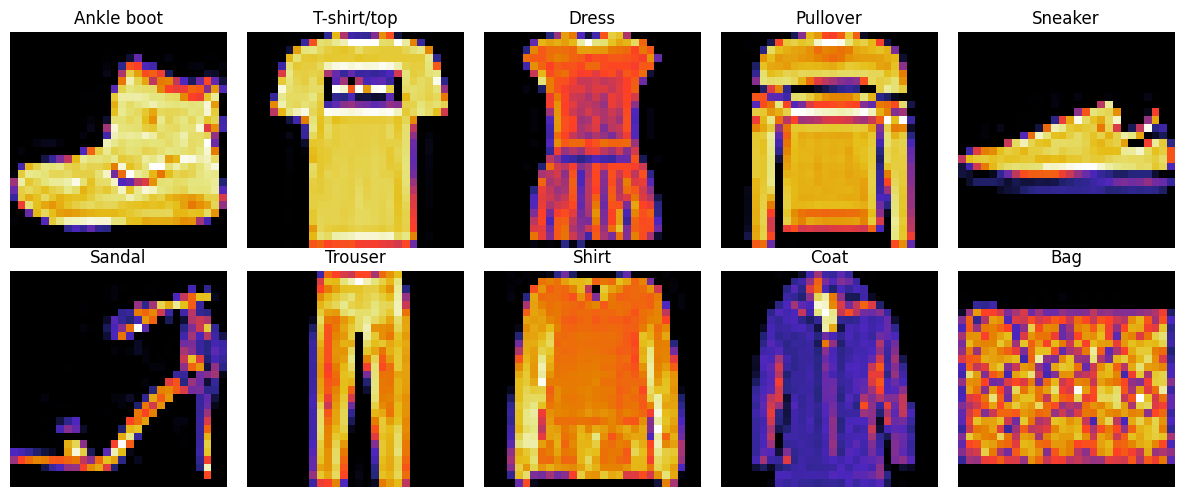

In [8]:
#ploting one image per class
def plot_one_sample_per_class(X, y, class_names):
    plotted_classes = set()
    plt.figure(figsize=(12, 5))
    count = 0

    for i in range(len(X)):
        label = y[i]
        if label not in plotted_classes:
            plotted_classes.add(label)
            count += 1
            plt.subplot(2, 5, count)
            plt.imshow(X[i], cmap="CMRmap") # try Blues, gray
            plt.title(class_names[label])
            plt.axis("off")

            if count == 10:
                break

    plt.tight_layout()
    plt.show()

plot_one_sample_per_class(X_train, y_train, CLASS_NAMES)


In [9]:
wandb.init(project="DLassignment1", name="question_1")

set1_images = []
set2_images = []

for i in range(18):
    set1_images.append(wandb.Image(X_train[i], caption=f"{CLASS_NAMES[y_train[i]]} (idx={i})"))

for i in range(18, 36):
    set2_images.append(wandb.Image(X_train[i], caption=f"{CLASS_NAMES[y_train[i]]} (idx={i})"))

wandb.log({"Set 1": set1_images, "Set 2": set2_images})
wandb.finish()


Q2


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist # loading the dataset

2025-03-08 16:14:05.630849: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-08 16:14:05.637320: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 16:14:05.696657: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 16:14:05.752604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741430645.802561   59511 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741430645.81

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode labels
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

# Neural Network Class
class FeedforwardNN:
    def __init__(self, input_size, hidden_layers, output_size=10, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.layers = [input_size] + hidden_layers + [output_size]
        self.weights = {}
        self.biases = {}
        
        # Initialize weights and biases
        for i in range(len(self.layers) - 1):
            self.weights[i] = np.random.randn(self.layers[i], self.layers[i + 1]) * 0.01
            self.biases[i] = np.zeros((1, self.layers[i + 1]))
    
    def relu(self, Z):
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        return Z > 0
    
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)
    
    def forward(self, X):
        cache = {'A0': X}
        A = X
        
        for i in range(len(self.layers) - 2):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = self.relu(Z)
            cache[f'Z{i+1}'] = Z
            cache[f'A{i+1}'] = A
        
        Z_final = np.dot(A, self.weights[len(self.layers)-2]) + self.biases[len(self.layers)-2]
        A_final = self.softmax(Z_final)
        
        cache[f'Z{len(self.layers)-1}'] = Z_final
        cache[f'A{len(self.layers)-1}'] = A_final
        
        return A_final, cache
    
    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m
        return loss
    
    def backward(self, cache, X, Y):
        m = X.shape[0]
        grads = {}
        
        dZ = cache[f'A{len(self.layers)-1}'] - Y
        
        for i in reversed(range(len(self.layers) - 1)):
            dW = (1/m) * np.dot(cache[f'A{i}'].T, dZ)
            db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
            
            grads[f'dW{i}'] = dW
            grads[f'db{i}'] = db
            
            if i > 0:
                dZ = np.dot(dZ, self.weights[i].T) * self.relu_derivative(cache[f'Z{i}'])
        
        return grads
    
    def update_parameters(self, grads):
        for i in range(len(self.layers) - 1):
            self.weights[i] -= self.learning_rate * grads[f'dW{i}']
            self.biases[i] -= self.learning_rate * grads[f'db{i}']
    
    def train(self, X, Y, epochs=10, batch_size=64):
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X, Y = X[indices], Y[indices]
            
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                Y_batch = Y[i:i+batch_size]
                
                Y_pred, cache = self.forward(X_batch)
                grads = self.backward(cache, X_batch, Y_batch)
                self.update_parameters(grads)
            
            if epoch % 2 == 0:
                loss = self.compute_loss(Y_pred, Y_batch)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
    
    def predict(self, X):
        Y_pred, _ = self.forward(X)
        return np.argmax(Y_pred, axis=1)
    
    def accuracy(self, X, Y):
        Y_pred = self.predict(X)
        Y_true = np.argmax(Y, axis=1)
        return np.mean(Y_pred == Y_true)

# Model Configuration
input_size = 784
hidden_layers = [128, 64]
output_size = 10
learning_rate = 0.01

dnn = FeedforwardNN(input_size, hidden_layers, output_size, learning_rate)

dnn.train(x_train, y_train, epochs=10, batch_size=128)

test_acc = dnn.accuracy(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


In [10]:
import numpy as np
import pandas as pd
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Initialize Weights & Biases (wandb)
wandb.init(project="DLassignment1")

# Load Fashion-MNIST Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print("Original shapes:")
print(" X_train:", X_train.shape)  # (60000, 28, 28)
print(" y_train:", y_train.shape)  # (60000,)
print(" X_test: ", X_test.shape)   # (10000, 28, 28)
print(" y_test: ", y_test.shape)   # (10000,)

# Reshape: 28x28 -> 784
X_train = X_train.reshape(-1, 28*28).astype(np.float32)
X_test  = X_test.reshape(-1, 28*28).astype(np.float32)

# Normalize pixel values to [0,1]
X_train /= 255.0
X_test  /= 255.0

print("\nAfter reshaping & normalization:")
print(" X_train:", X_train.shape)  # (60000, 784)
print(" X_test: ", X_test.shape)   # (10000, 784)


# One-hot encode labels
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]
y_test_onehot = np.eye(num_classes)[y_test]


Original shapes:
 X_train: (60000, 28, 28)
 y_train: (60000,)
 X_test:  (10000, 28, 28)
 y_test:  (10000,)

After reshaping & normalization:
 X_train: (60000, 784)
 X_test:  (10000, 784)


In [11]:
def one_hot_encode(labels, num_classes=10):
    """
    Converts a 1D array of labels into a 2D one-hot encoded array.
    """
    one_hot = np.zeros((labels.shape[0], num_classes))
    one_hot[np.arange(labels.shape[0]), labels] = 1.0
    return one_hot

y_train_oh = one_hot_encode(y_train, 10)
y_test_oh  = one_hot_encode(y_test, 10)

print("y_train_oh shape:", y_train_oh.shape)  # (60000, 10)
print("y_test_oh shape: ", y_test_oh.shape)   # (10000, 10)


y_train_oh shape: (60000, 10)
y_test_oh shape:  (10000, 10)


In [14]:
def relu(Z):
    """ReLU activation: max(0, Z)."""
    return np.maximum(0, Z)

def relu_derivative(Z):
    """Derivative of ReLU w.r.t. Z (returns 1 where Z > 0)."""
    return (Z > 0).astype(Z.dtype)

def softmax(Z):
    """Softmax activation for output layer."""
    shiftZ = Z - np.max(Z, axis=1, keepdims=True)  # for numerical stability
    expZ = np.exp(shiftZ)
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def cross_entropy_loss(probs, one_hot_labels):
    """
    Cross-entropy loss for multi-class classification.
      - probs: (N, 10) softmax outputs
      - one_hot_labels: (N, 10)
    """
    eps = 1e-9
    log_probs = -np.log(probs + eps)
    return np.mean(np.sum(log_probs * one_hot_labels, axis=1))

def accuracy(probs, one_hot_labels):
    """Computes accuracy from predicted probabilities and one-hot labels."""
    pred_labels = np.argmax(probs, axis=1)
    true_labels = np.argmax(one_hot_labels, axis=1)
    return np.mean(pred_labels == true_labels)

def initialize_parameters(layer_sizes):
    """
    layer_sizes: List of dimensions, e.g. [784, 128, 64, 10].
    Returns a dictionary with weights W1, W2, ... and biases b1, b2, ...
    """
    np.random.seed(42)  # for reproducibility
    params = {}
    for i in range(len(layer_sizes) - 1):
        in_size = layer_sizes[i]
        out_size = layer_sizes[i+1]
        # He initialization for layers with ReLU activation
        params[f"W{i+1}"] = np.random.randn(in_size, out_size) * np.sqrt(2.0 / in_size)
        params[f"b{i+1}"] = np.zeros((1, out_size))
    return params

def forward_pass(X, params, layer_sizes):
    """
    X: (N, input_size) input data
    params: Dictionary of weights and biases
    layer_sizes: e.g. [784, 128, 64, 10]
    
    Returns:
      - probs: (N, 10) final softmax output.
      - cache: Dictionary of intermediate values (Z and A for each layer).
    """
    cache = {}
    A = X  # input activation
    num_layers = len(layer_sizes) - 1
    for i in range(num_layers):
        W = params[f"W{i+1}"]
        b = params[f"b{i+1}"]
        Z = A @ W + b
        cache[f"Z{i+1}"] = Z
        if i < num_layers - 1:
            # Hidden layer: use ReLU activation
            A = relu(Z)
        else:
            # Output layer: use softmax activation
            A = softmax(Z)
        cache[f"A{i+1}"] = A
    probs = A
    return probs, cache

def backward_pass(X, y_true, params, cache, layer_sizes):
    """
    X: (N, input_size) input data.
    y_true: (N, 10) one-hot labels.
    params: Dictionary of weights and biases.
    cache: Dictionary of intermediate values from forward_pass.
    layer_sizes: List, e.g. [784, 128, 64, 10].
    
    Returns:
      grads: Dictionary containing gradients for W and b for each layer.
    """
    grads = {}
    N = X.shape[0]
    num_layers = len(layer_sizes) - 1  # number of layers with parameters
    
    # --- Output Layer ---
    i = num_layers - 1  # index for output layer (e.g., 2 for a network with 3 layers)
    A_out = cache[f"A{i+1}"]  # softmax output, shape (N, 10)
    # For softmax-crossentropy, dZ = A_out - y_true
    dZ = A_out - y_true  # shape (N, 10)
    if i == 0:
        A_prev = X
    else:
        A_prev = cache[f"A{i}"]
    grads[f"dW{i+1}"] = (A_prev.T @ dZ) / N
    grads[f"db{i+1}"] = np.sum(dZ, axis=0, keepdims=True) / N
    
    # --- Hidden Layers ---
    # Propagate gradient backwards for hidden layers (from layer num_layers-2 down to 0)
    for i in reversed(range(num_layers - 1)):
        # Propagate through layer i+1 to get gradients for layer i
        # Use weights from the layer ahead: W{i+2}
        W_next = params[f"W{i+2}"]
        dA = dZ @ W_next.T  # shape: (N, layer_sizes[i+1])
        Z_curr = cache[f"Z{i+1}"]
        dZ = dA * relu_derivative(Z_curr)  # derivative through ReLU
        if i == 0:
            A_prev = X
        else:
            A_prev = cache[f"A{i}"]
        grads[f"dW{i+1}"] = (A_prev.T @ dZ) / N
        grads[f"db{i+1}"] = np.sum(dZ, axis=0, keepdims=True) / N
    
    return grads
def update_parameters(params, grads, learning_rate):
    """
    Updates parameters using gradient descent.
    """
    for key in params.keys():
        if key.startswith("W"):
            i = key[1:]  # extract layer number from key "W1", "W2", etc.
            params[key] -= learning_rate * grads[f"dW{i}"]
        elif key.startswith("b"):
            i = key[1:]
            params[key] -= learning_rate * grads[f"db{i}"]
    return params

def train_network(
    X_train, y_train_oh,
    X_test, y_test_oh,
    layer_sizes,
    epochs=10,
    learning_rate=0.01,
    project_name="DL_Assignment1"
):
    """
    Trains the feedforward neural network (pure NumPy) on Fashion-MNIST.
    Logs training and test metrics to Weights & Biases.
    
    Args:
      - X_train, y_train_oh: Training data and one-hot labels.
      - X_test, y_test_oh: Test data and one-hot labels.
      - layer_sizes: List of layer dimensions, e.g. [784, 128, 64, 10].
      - epochs: Number of training epochs.
      - learning_rate: Learning rate for gradient descent.
      - project_name: W&B project name (string).
    
    Returns:
      - params: Trained network parameters.
    """
    # Initialize a new W&B run (ensure wandb.login() is done in an earlier cell)
    wandb.init(project=project_name, name="feedforward_numpy_network")
    
    # Initialize network parameters
    params = initialize_parameters(layer_sizes)
    
    for epoch in range(epochs):
        # Forward pass on training data
        probs_train, cache_train = forward_pass(X_train, params, layer_sizes)
        train_loss = cross_entropy_loss(probs_train, y_train_oh)
        train_acc  = accuracy(probs_train, y_train_oh)
        
        # Backward pass
        grads_train = backward_pass(X_train, y_train_oh, params, cache_train, layer_sizes)
        
        # Update parameters
        params = update_parameters(params, grads_train, learning_rate)
        
        # Evaluate on test data
        probs_test, _ = forward_pass(X_test, params, layer_sizes)
        test_loss = cross_entropy_loss(probs_test, y_test_oh)
        test_acc  = accuracy(probs_test, y_test_oh)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        
        # Log metrics to W&B
        wandb.log({
            "epoch": epoch+1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "test_loss": test_loss,
            "test_acc": test_acc
        })
    
    wandb.finish()
    return params


In [15]:
# Cell 10
def train_network(
    X_train, y_train_oh,
    X_test, y_test_oh,
    layer_sizes,
    epochs=10,
    learning_rate=0.01,
    project_name="DL_Assignment1"
):
    """
    Trains the feedforward NN on Fashion-MNIST in pure NumPy.
    Logs metrics to Weights & Biases (W&B).
    
    Args:
        X_train, y_train_oh: training data & one-hot labels
        X_test, y_test_oh: test data & one-hot labels
        layer_sizes: e.g. [784, 128, 64, 10]
        epochs: number of training epochs
        learning_rate: gradient descent LR
        project_name: W&B project name for logging
    """
    # 1) Initialize W&B run
    wandb.init(project=DL_Assignment1, name="feedforward")
    
    # 2) Initialize parameters
    params = initialize_parameters(layer_sizes)
    
    # 3) Training loop
    for epoch in range(epochs):
        # Forward pass
        probs_train, cache_train = forward_pass(X_train, params, layer_sizes)
        train_loss = cross_entropy_loss(probs_train, y_train_oh)
        train_acc  = accuracy(probs_train, y_train_oh)
        
        # Backward pass
        grads_train = backward_pass(X_train, y_train_oh, params, cache_train, layer_sizes)
        
        # Update
        params = update_parameters(params, grads_train, learning_rate)
        
        # Evaluate on test set
        probs_test, _ = forward_pass(X_test, params, layer_sizes)
        test_loss = cross_entropy_loss(probs_test, y_test_oh)
        test_acc  = accuracy(probs_test, y_test_oh)
        
        # Print metrics
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        
        # Log to W&B
        wandb.log({
            "epoch": epoch+1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "test_loss": test_loss,
            "test_acc": test_acc
        })
    
    # 4) Finish W&B run
    wandb.finish()
    
    return params


In [18]:
# Standard SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                params[key] -= self.lr * grads[key]
        return params

# Momentum-based gradient descent
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = {}  # velocity dictionary
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                self.v[key] = self.momentum * self.v[key] + self.lr * grads[key]
                params[key] -= self.v[key]
        return params

# Nesterov Accelerated Gradient Descent
class Nesterov:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = {}
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                v_prev = self.v[key].copy()
                # Standard momentum update in Nesterov form
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                # Nesterov update uses a lookahead: update using v_prev and new v
                params[key] += -self.momentum * v_prev + (1 + self.momentum) * self.v[key]
        return params

# RMSprop optimizer
class RMSprop:
    def __init__(self, lr=0.001, decay_rate=0.99, epsilon=1e-8):
        self.lr = lr
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.cache = {}
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                if key not in self.cache:
                    self.cache[key] = np.zeros_like(params[key])
                self.cache[key] = self.decay_rate * self.cache[key] + (1 - self.decay_rate) * (grads[key]**2)
                params[key] -= self.lr * grads[key] / (np.sqrt(self.cache[key]) + self.epsilon)
        return params

# Adam optimizer
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {}
        self.v = {}
    def update(self, params, grads, t):
        for key in params:
            if key in grads:
                if key not in self.m:
                    self.m[key] = np.zeros_like(params[key])
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
                self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key]**2)
                m_hat = self.m[key] / (1 - self.beta1**t)
                v_hat = self.v[key] / (1 - self.beta2**t)
                params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params

# Nadam optimizer (Adam with Nesterov momentum)
class Nadam:
    def __init__(self, lr=0.002, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {}
        self.v = {}
    def update(self, params, grads, t):
        for key in params:
            if key in grads:
                if key not in self.m:
                    self.m[key] = np.zeros_like(params[key])
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
                self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key]**2)
                m_hat = self.m[key] / (1 - self.beta1**t)
                v_hat = self.v[key] / (1 - self.beta2**t)
                # Nadam update: combines Adam with Nesterov momentum
                params[key] -= self.lr * ((self.beta1 * m_hat + (1 - self.beta1) * grads[key] / (1 - self.beta1**t))
                                          / (np.sqrt(v_hat) + self.epsilon))
        return params


In [19]:
def train_network_batch(X_train, y_train_oh, X_test, y_test_oh,
                        layer_sizes, optimizer, epochs=10, batch_size=64,
                        project_name="DL_Assignment1"):
    """
    Trains the feedforward NN using mini-batch gradient descent.
    
    Args:
      X_train, y_train_oh: Training data and one-hot labels.
      X_test, y_test_oh: Test data and one-hot labels.
      layer_sizes: List of layer sizes, e.g. [784, 128, 64, 10].
      optimizer: An instance of one of the optimizer classes (e.g. SGD, Adam, etc.).
      epochs: Number of epochs.
      batch_size: Mini-batch size.
      project_name: W&B project name (string).
      
    Returns:
      params: Trained network parameters.
    """
    # Initialize a new W&B run (ensure wandb.login() was run earlier)
    wandb.init(project=project_name, name=f"{optimizer.__class__.__name__}_run")
    
    params = initialize_parameters(layer_sizes)
    t = 0  # global iteration counter
    N = X_train.shape[0]
    
    for epoch in range(epochs):
        # Shuffle training data
        permutation = np.random.permutation(N)
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train_oh[permutation]
        
        # Process mini-batches
        for i in range(0, N, batch_size):
            t += 1
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            
            probs, cache = forward_pass(X_batch, params, layer_sizes)
            grads = backward_pass(X_batch, y_batch, params, cache, layer_sizes)
            # Use the chosen optimizer to update parameters
            # For optimizers like Adam/Nadam, pass the iteration count t
            params = optimizer.update(params, grads, t)
        
        # End-of-epoch evaluation on full training and test sets
        probs_train, _ = forward_pass(X_train, params, layer_sizes)
        train_loss = cross_entropy_loss(probs_train, y_train_oh)
        train_acc = accuracy(probs_train, y_train_oh)
        
        probs_test, _ = forward_pass(X_test, params, layer_sizes)
        test_loss = cross_entropy_loss(probs_test, y_test_oh)
        test_acc = accuracy(probs_test, y_test_oh)
        
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        
        wandb.log({
            "epoch": epoch+1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "test_loss": test_loss,
            "test_acc": test_acc
        })
        
    wandb.finish()
    return params


In [ ]:
# Log in to W&B (run this cell once per session)
wandb.login()

# Define network architecture
layer_sizes = [784, 128, 64, 10]

# Choose an optimizer (change to SGD, Momentum, Nesterov, RMSprop, Adam, or Nadam)
# For example, using Adam:
optimizer = SGD(lr=0.01)

# Train the network with mini-batch training
trained_params = train_network_batch(
    X_train, y_train_oh,
    X_test, y_test_oh,
    layer_sizes=layer_sizes,
    optimizer=optimizer,
    epochs=50,
    batch_size=32, 
    project_name="DLassignment1"
)


Epoch 1/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 2/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 3/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 4/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 5/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 6/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 7/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 8/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 9/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 10/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 11/50 | Train Loss: 2.4500, Train Acc: 0.1179 | Test Loss: 2.4440, Test Acc: 0.1208
Epoch 12/50 | Train

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
test_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,50
test_acc,0.1208
test_loss,2.44401
train_acc,0.1179
train_loss,2.45002


In [27]:
probs_test, _ = forward_pass(X_test, trained_params, layer_sizes)
final_test_loss = cross_entropy_loss(probs_test, y_test_oh)
final_test_acc = accuracy(probs_test, y_test_oh)
print(f"Final Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {final_test_acc:.4f}")


Final Test Loss: 2.4440
Final Test Accuracy: 0.1208


Q4


In [28]:
# Cell 2

def load_data(val_split=0.1):
    """
    Loads Fashion-MNIST, reshapes & normalizes it, and splits off 'val_split' fraction
    of the training data as validation data.
    Returns: (X_train, y_train), (X_val, y_val), (X_test, y_test)
    """
    (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
    
    # Flatten 28x28 => 784, normalize
    X_train_full = X_train_full.reshape(-1, 784).astype(np.float32) / 255.0
    X_test       = X_test.reshape(-1, 784).astype(np.float32) / 255.0
    
    # Reserve 10% of training data for validation
    val_size = int(val_split * len(X_train_full))
    X_val = X_train_full[:val_size]
    y_val = y_train_full[:val_size]
    X_train = X_train_full[val_size:]
    y_train = y_train_full[val_size:]
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


def one_hot_encode(labels, num_classes=10):
    """
    Converts a 1D array of labels (0..9) into a 2D one-hot encoded array.
    """
    one_hot = np.zeros((labels.shape[0], num_classes))
    one_hot[np.arange(labels.shape[0]), labels] = 1.0
    return one_hot


In [29]:
# Cell 3

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(Z.dtype)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    # If A = sigmoid(Z), derivative wrt Z is A*(1-A)
    return A*(1 - A)

def tanh(Z):
    return np.tanh(Z)

def tanh_derivative(A):
    # If A = tanh(Z), derivative wrt Z is 1 - A^2
    return 1 - A**2

def softmax(Z):
    shiftZ = Z - np.max(Z, axis=1, keepdims=True)
    expZ = np.exp(shiftZ)
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def cross_entropy_loss(probs, one_hot_labels):
    eps = 1e-9
    log_probs = -np.log(probs + eps)
    return np.mean(np.sum(log_probs * one_hot_labels, axis=1))

def accuracy(probs, one_hot_labels):
    pred_labels = np.argmax(probs, axis=1)
    true_labels = np.argmax(one_hot_labels, axis=1)
    return np.mean(pred_labels == true_labels)


def xavier_init(in_dim, out_dim):
    # Xavier uniform
    limit = np.sqrt(6.0 / (in_dim + out_dim))
    return np.random.uniform(-limit, limit, (in_dim, out_dim))

def random_init(in_dim, out_dim):
    # Basic random normal scaled by 0.01
    return 0.01 * np.random.randn(in_dim, out_dim)


In [30]:
# Cell 4

def initialize_parameters(input_dim, num_hidden_layers, hidden_size, output_dim,
                          weight_init="random"):
    """
    Creates parameter dict: W1, b1, W2, b2, ..., WL, bL
    Where L = num_hidden_layers + 1 (the output layer)
    """
    params = {}
    prev_dim = input_dim
    
    for i in range(num_hidden_layers):
        layer_name = i+1
        if weight_init == "xavier":
            params[f"W{layer_name}"] = xavier_init(prev_dim, hidden_size)
        else:  # "random"
            params[f"W{layer_name}"] = random_init(prev_dim, hidden_size)
        params[f"b{layer_name}"] = np.zeros((1, hidden_size))
        prev_dim = hidden_size
    
    # Output layer
    layer_name = num_hidden_layers + 1
    if weight_init == "xavier":
        params[f"W{layer_name}"] = xavier_init(prev_dim, output_dim)
    else:
        params[f"W{layer_name}"] = random_init(prev_dim, output_dim)
    params[f"b{layer_name}"] = np.zeros((1, output_dim))
    
    return params


def forward_pass(X, params, num_hidden_layers, activation):
    """
    Forward pass through the network. 
    activation in {"relu", "sigmoid", "tanh"} for hidden layers.
    Softmax output layer.
    Returns final probs and a cache of intermediate values.
    """
    cache = {}
    A = X
    L = num_hidden_layers + 1  # total layers
    
    for i in range(1, L+1):
        W = params[f"W{i}"]
        b = params[f"b{i}"]
        Z = A @ W + b
        
        if i < L:
            # Hidden layer
            if activation == "relu":
                A = relu(Z)
            elif activation == "sigmoid":
                A = sigmoid(Z)
            else: # "tanh"
                A = tanh(Z)
            cache[f"Z{i}"] = Z
            cache[f"A{i}"] = A
        else:
            # Output layer => softmax
            probs = softmax(Z)
            cache[f"Z{i}"] = Z
            cache[f"A{i}"] = probs
    
    return probs, cache


def backward_pass(X, y, params, cache, num_hidden_layers, activation):
    """
    Backprop through the network:
      X: input batch
      y: one-hot labels
      cache: forward-pass intermediates
    """
    grads = {}
    L = num_hidden_layers + 1
    m = X.shape[0]  # batch size
    
    # 1) Output layer gradient
    A_out = cache[f"A{L}"]      # (m, 10)
    dZ = A_out - y              # derivative wrt Z in output layer
    # A_{L-1} is the activation from the last hidden layer (or X if only 1 layer)
    A_prev = cache[f"A{L-1}"] if L > 1 else X
    grads[f"dW{L}"] = (A_prev.T @ dZ) / m
    grads[f"db{L}"] = np.sum(dZ, axis=0, keepdims=True) / m
    
    # 2) Hidden layers (in reverse)
    for i in reversed(range(1, L)):
        W_next = params[f"W{i+1}"]
        Z_curr = cache[f"Z{i}"]
        if i == 1:
            A_prev = X
        else:
            A_prev = cache[f"A{i-1}"]
        
        dA = dZ @ W_next.T
        # derivative depends on activation
        if activation == "relu":
            dZ = dA * relu_derivative(Z_curr)
        elif activation == "sigmoid":
            A_curr = cache[f"A{i}"]
            dZ = dA * sigmoid_derivative(A_curr)
        else:  # "tanh"
            A_curr = cache[f"A{i}"]
            dZ = dA * tanh_derivative(A_curr)
        
        grads[f"dW{i}"] = (A_prev.T @ dZ) / m
        grads[f"db{i}"] = np.sum(dZ, axis=0, keepdims=True) / m
    
    return grads


def update_parameters(params, grads, learning_rate, weight_decay=0.0):
    """
    Updates params in-place with gradient descent step and optional weight decay (L2).
    """
    for key in params:
        if key.startswith("W"):
            # L2 penalty
            params[key] -= learning_rate * (grads[f"d{key}"] + weight_decay * params[key])
        elif key.startswith("b"):
            params[key] -= learning_rate * grads[f"d{key}"]
    return params


def train_one_epoch(X_train, y_train, params, num_hidden_layers, activation,
                    batch_size, learning_rate, weight_decay=0.0):
    """
    Trains for 1 epoch using mini-batch SGD.
    Returns train_loss, train_acc for this epoch.
    """
    N = X_train.shape[0]
    permutation = np.random.permutation(N)
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    
    total_loss = 0.0
    total_correct = 0
    
    for i in range(0, N, batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # Forward
        probs, cache = forward_pass(X_batch, params, num_hidden_layers, activation)
        loss = cross_entropy_loss(probs, y_batch)
        total_loss += loss * len(X_batch)
        
        # Accuracy
        pred_labels = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        total_correct += np.sum(pred_labels == true_labels)
        
        # Backward
        grads = backward_pass(X_batch, y_batch, params, cache, num_hidden_layers, activation)
        
        # Update
        params = update_parameters(params, grads, learning_rate, weight_decay)
    
    # Compute average metrics
    avg_loss = total_loss / N
    avg_acc  = total_correct / N
    return avg_loss, avg_acc


In [31]:
# Cell 5

def train():
    # Start a new W&B run
    wandb.init()
    config = wandb.config
    
    # Load data
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = load_data(val_split=0.1)
    # One-hot
    y_train_oh = one_hot_encode(y_train)
    y_val_oh   = one_hot_encode(y_val)
    y_test_oh  = one_hot_encode(y_test)
    
    # Create run name for clarity
    run_name = f"hl_{config.num_hidden_layers}_bs_{config.batch_size}_ac_{config.activation}"
    wandb.run.name = run_name
    
    # Initialize parameters
    input_dim  = 784
    output_dim = 10
    params = initialize_parameters(
        input_dim,
        num_hidden_layers=config.num_hidden_layers,
        hidden_size=config.hidden_layer_size,
        output_dim=output_dim,
        weight_init=config.weight_init
    )
    
    # Training loop
    for epoch in range(config.epochs):
        train_loss, train_acc = train_one_epoch(
            X_train, y_train_oh, 
            params,
            num_hidden_layers=config.num_hidden_layers,
            activation=config.activation,
            batch_size=config.batch_size,
            learning_rate=config.learning_rate,
            weight_decay=config.weight_decay
        )
        
        # Validation metrics
        probs_val, _ = forward_pass(X_val, params, config.num_hidden_layers, config.activation)
        val_loss = cross_entropy_loss(probs_val, y_val_oh)
        val_acc  = accuracy(probs_val, y_val_oh)
        
        # Log to W&B
        wandb.log({
            "epoch": epoch+1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })
    
    # Evaluate on test set once
    probs_test, _ = forward_pass(X_test, params, config.num_hidden_layers, config.activation)
    test_loss = cross_entropy_loss(probs_test, y_test_oh)
    test_acc  = accuracy(probs_test, y_test_oh)
    wandb.log({
        "test_loss": test_loss,
        "test_acc": test_acc
    })
    
    wandb.finish()


In [32]:
# Cell 6

sweep_config = {
    "name": "fashion_mnist_sweep_example",  # or any descriptive name
    "method": "random",  # can also be "grid" or "bayes"
    "metric": {
        "name": "val_acc",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {
            "values": [5, 10]
        },
        "num_hidden_layers": {
            "values": [3, 4, 5]
        },
        "hidden_layer_size": {
            "values": [32, 64, 128]
        },
        "weight_decay": {
            "values": [0.0, 0.0005, 0.5]
        },
        "learning_rate": {
            "values": [1e-3, 1e-4]
        },
        "batch_size": {
            "values": [16, 32, 64]
        },
        "weight_init": {
            "values": ["random", "xavier"]
        },
        "activation": {
            "values": ["sigmoid", "tanh", "relu"]
        },
        "optimizer": {"values": ["sgd", "momentum", "rmsprop", "adam"]}  # New Field for Optimizers

    }
}


In [33]:
# New Code: Optimizer Classes

class SGD:
    def __init__(self, lr):
        self.lr = lr
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                params[key] -= self.lr * grads[key]
        return params

class Momentum:
    def __init__(self, lr, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = {}
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                self.v[key] = self.momentum * self.v[key] + self.lr * grads[key]
                params[key] -= self.v[key]
        return params

class RMSprop:
    def __init__(self, lr, decay_rate=0.99, epsilon=1e-8):
        self.lr = lr
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.cache = {}
    def update(self, params, grads, t=None):
        for key in params:
            if key in grads:
                if key not in self.cache:
                    self.cache[key] = np.zeros_like(params[key])
                self.cache[key] = self.decay_rate * self.cache[key] + (1 - self.decay_rate) * (grads[key] ** 2)
                params[key] -= self.lr * grads[key] / (np.sqrt(self.cache[key]) + self.epsilon)
        return params

class Adam:
    def __init__(self, lr, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = {}
        self.v = {}
    def update(self, params, grads, t):
        for key in params:
            if key in grads:
                if key not in self.m:
                    self.m[key] = np.zeros_like(params[key])
                if key not in self.v:
                    self.v[key] = np.zeros_like(params[key])
                self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
                self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key] ** 2)
                m_hat = self.m[key] / (1 - self.beta1 ** t)
                v_hat = self.v[key] / (1 - self.beta2 ** t)
                params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return params


In [34]:
# Updated train_one_epoch() function

def train_one_epoch(X_train, y_train, params, num_hidden_layers, activation,
                    batch_size, learning_rate, weight_decay=0.0, optimizer="sgd",
                    beta1=0.9, beta2=0.999, epsilon=1e-8, momentum=0.9, decay_rate=0.99):

    """
    Trains for 1 epoch using mini-batch gradient descent.
    Supports multiple optimizers: SGD, Momentum, Nesterov, RMSprop, Adam, Nadam.
    
    Args:
        X_train, y_train: Training data & labels (one-hot encoded).
        params: Model parameters.
        num_hidden_layers: Number of hidden layers.
        activation: Activation function ("relu", "sigmoid", "tanh").
        batch_size: Mini-batch size.
        learning_rate: Learning rate for optimization.
        weight_decay: L2 regularization term (if used).
        optimizer: String defining optimizer type ("sgd", "momentum", "nesterov", "rmsprop", "adam", "nadam").
        beta1, beta2: Adam/Nadam exponential decay rates.
        epsilon: Small constant for numerical stability (Adam/Nadam).
        momentum: Momentum factor for momentum-based optimizers.
        decay_rate: Decay factor for RMSprop.

    Returns:
        train_loss, train_acc: Loss & accuracy for this epoch.
    """

    N = X_train.shape[0]
    permutation = np.random.permutation(N)
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    
    total_loss = 0.0
    total_correct = 0

    # Initialize optimizer-specific caches
    v = {}  # Momentum/Nesterov
    s = {}  # RMSprop, Adam, Nadam
    t = 0   # Adam/Nadam time step counter
    
    for key in params:
        v[key] = np.zeros_like(params[key])  # Initialize momentum term
        s[key] = np.zeros_like(params[key])  # Initialize second moment term

    for i in range(0, N, batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # Forward Pass
        probs, cache = forward_pass(X_batch, params, num_hidden_layers, activation)
        loss = cross_entropy_loss(probs, y_batch)
        total_loss += loss * len(X_batch)

        # Accuracy
        pred_labels = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        total_correct += np.sum(pred_labels == true_labels)
        
        # Backward Pass
        grads = backward_pass(X_batch, y_batch, params, cache, num_hidden_layers, activation)
        
        # Update parameters based on optimizer choice
        t += 1  # Increment time step for Adam/Nadam
        
        for key in params:
            if key.startswith("W"):
                if optimizer == "sgd":
                    # Vanilla SGD
                    params[key] -= learning_rate * (grads[f"d{key}"] + weight_decay * params[key])
                
                elif optimizer == "momentum":
                    # Momentum-based SGD
                    v[key] = momentum * v[key] - learning_rate * grads[f"d{key}"]
                    params[key] += v[key]

                elif optimizer == "nesterov":
                    # Nesterov Accelerated Gradient (Lookahead step)
                    v_prev = v[key]
                    v[key] = momentum * v[key] - learning_rate * grads[f"d{key}"]
                    params[key] += -momentum * v_prev + (1 + momentum) * v[key]
                
                elif optimizer == "rmsprop":
                    # RMSprop
                    s[key] = decay_rate * s[key] + (1 - decay_rate) * (grads[f"d{key}"] ** 2)
                    params[key] -= learning_rate * grads[f"d{key}"] / (np.sqrt(s[key]) + epsilon)

                elif optimizer == "adam":
                    # Adam optimizer
                    v[key] = beta1 * v[key] + (1 - beta1) * grads[f"d{key}"]
                    s[key] = beta2 * s[key] + (1 - beta2) * (grads[f"d{key}"] ** 2)
                    v_corrected = v[key] / (1 - beta1 ** t)
                    s_corrected = s[key] / (1 - beta2 ** t)
                    params[key] -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)

                elif optimizer == "nadam":
                    # Nadam (Adam + Nesterov momentum)
                    v[key] = beta1 * v[key] + (1 - beta1) * grads[f"d{key}"]
                    s[key] = beta2 * s[key] + (1 - beta2) * (grads[f"d{key}"] ** 2)
                    v_corrected = v[key] / (1 - beta1 ** t)
                    s_corrected = s[key] / (1 - beta2 ** t)
                    nadam_update = beta1 * v_corrected + (1 - beta1) * grads[f"d{key}"] / (1 - beta1 ** t)
                    params[key] -= learning_rate * nadam_update / (np.sqrt(s_corrected) + epsilon)

            elif key.startswith("b"):
                # Bias updates (same update rule as weights, but without L2 regularization)
                params[key] -= learning_rate * grads[f"d{key}"]

    # Compute average metrics
    avg_loss = total_loss / N
    avg_acc  = total_correct / N
    return avg_loss, avg_acc


In [35]:
# Cell 5

def train():
    # Start a new W&B run
    wandb.init()
    config = wandb.config
    
    # Load data
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = load_data(val_split=0.1)
    # One-hot
    y_train_oh = one_hot_encode(y_train)
    y_val_oh   = one_hot_encode(y_val)
    y_test_oh  = one_hot_encode(y_test)
    
    # Create run name for clarity
    run_name = f"hl_{config.num_hidden_layers}_bs_{config.batch_size}_ac_{config.activation}"
    wandb.run.name = run_name
    
    # Initialize parameters
    input_dim  = 784
    output_dim = 10
    params = initialize_parameters(
        input_dim,
        num_hidden_layers=config.num_hidden_layers,
        hidden_size=config.hidden_layer_size,
        output_dim=output_dim,
        weight_init=config.weight_init
    )
    
    # Training loop
    for epoch in range(config.epochs):
        train_loss, train_acc = train_one_epoch(
            X_train, y_train_oh, 
            params,
            num_hidden_layers=config.num_hidden_layers,
            activation=config.activation,
            batch_size=config.batch_size,
            learning_rate=config.learning_rate,
            weight_decay=config.weight_decay,
            optimizer=config.optimizer,
            beta1=0.9, beta2=0.999, epsilon=1e-8, momentum=0.9, decay_rate=0.99

        )
        
        # Validation metrics
        probs_val, _ = forward_pass(X_val, params, config.num_hidden_layers, config.activation)
        val_loss = cross_entropy_loss(probs_val, y_val_oh)
        val_acc  = accuracy(probs_val, y_val_oh)
        
        # Log to W&B
        wandb.log({
            "epoch": epoch+1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })
    
    # Evaluate on test set once
    probs_test, _ = forward_pass(X_test, params, config.num_hidden_layers, config.activation)
    test_loss = cross_entropy_loss(probs_test, y_test_oh)
    test_acc  = accuracy(probs_test, y_test_oh)
    wandb.log({
        "test_loss": test_loss,
        "test_acc": test_acc
    })
    
    wandb.finish()


In [36]:
# Cell 7

# 7a) Log in to W&B if not already
wandb.login()

# 7b) Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="DLassignment1")  # set your W&B project name

# 7c) Run the sweep
#    count=10 => run 10 random trials from the hyperparameter space
wandb.agent(sweep_id, function=train, count=10)


Create sweep with ID: uz2tgs7m
Sweep URL: https://wandb.ai/snehalma23m020-iit-madras/DLassignment1/sweeps/uz2tgs7m


wandb: Agent Starting Run: ovdja3ua with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


epoch,▁▃▅▆█
test_acc,▁
test_loss,▁
train_acc,▁▅███
train_loss,█▄▃▂▁
val_acc,▁████
val_loss,█▅▃▂▁
epoch,5
test_acc,0.2001
test_loss,1.85787
train_acc,0.1995


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nnshzov6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


epoch,▁▃▅▆█
test_acc,▁
test_loss,▁
train_acc,██▁██
train_loss,█▅▄▂▁
val_acc,▁▁▁▁▁
val_loss,█▅▃▂▁
epoch,5
test_acc,0.1
test_loss,2.30266
train_acc,0.10013


wandb: Agent Starting Run: 6tokstu5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▁▆▇▇▇█████
train_loss,█▃▂▂▂▁▁▁▁▁
val_acc,▁▄▆▆▇▇▇▇▇█
val_loss,█▅▃▃▂▂▂▁▁▁
epoch,10
test_acc,0.8521
test_loss,0.42071
train_acc,0.86407


wandb: Agent Starting Run: qdfguzug with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 128
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▁▅▆▇▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
val_acc,▁▃▄▆▇▆████
val_loss,█▅▄▂▂▂▁▁▁▁
epoch,10
test_acc,0.8767
test_loss,0.35805
train_acc,0.89657


wandb: Agent Starting Run: 1ubbotc3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▇▁▇▆▁▃▁▃█▅
train_loss,█▂▁▁▁▁▁▁▁▁
val_acc,█▅▅▁█▅▅▁▅▁
val_loss,▃▆▇▁▃▇▇▂▃█
epoch,10
test_acc,0.1
test_loss,2.30259
train_acc,0.09917


wandb: Agent Starting Run: ksdim6gx with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


epoch,▁▃▅▆█
test_acc,▁
test_loss,▁
train_acc,▁▆▇██
train_loss,█▃▂▁▁
val_acc,▁▅▆██
val_loss,█▄▃▁▁
epoch,5
test_acc,0.8008
test_loss,0.5619
train_acc,0.80633


wandb: Agent Starting Run: 0gqu6wpz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


epoch,▁▃▅▆█
test_acc,▁
test_loss,▁
train_acc,▁▆▇██
train_loss,█▃▂▁▁
val_acc,▁▅▇██
val_loss,█▄▃▂▁
epoch,5
test_acc,0.82
test_loss,0.51844
train_acc,0.82459


wandb: Agent Starting Run: kzvf60au with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 128
wandb: 	learning_rate: 0.001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▁▄▅▆▇▇▇███
train_loss,█▅▄▃▂▂▂▁▁▁
val_acc,▁▄▆▃▅▇██▇█
val_loss,█▅▃▆▄▁▁▂▂▁
epoch,10
test_acc,0.8804
test_loss,0.34373
train_acc,0.9075


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: it57ss9l with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 4
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▁▆▆▇▇▇████
train_loss,█▃▂▂▂▁▁▁▁▁
val_acc,▁▄▄▅▅▇▆▇██
val_loss,█▅▄▃▃▂▂▂▁▁
epoch,10
test_acc,0.6255
test_loss,0.91256
train_acc,0.63702


wandb: Agent Starting Run: u6g30sbx with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	num_hidden_layers: 3
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


epoch,▁▂▃▃▄▅▆▆▇█
test_acc,▁
test_loss,▁
train_acc,▁▅▆▇▇▇████
train_loss,█▄▃▂▂▂▁▁▁▁
val_acc,▁▄▆▆▇▇████
val_loss,█▅▃▃▂▂▂▁▁▁
epoch,10
test_acc,0.8509
test_loss,0.42796
train_acc,0.86602
